In [1]:
import pandas as pd
import missingno as msno
import matplotlib as plt
import sqlalchemy as db
from sqlalchemy import create_engine

Cargamos los DataFrame.

In [2]:
df_customers = pd.read_csv('https://raw.githubusercontent.com/lulo76/Proyecto-Final-DTS--05/main/Week%201/Datasets/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('https://raw.githubusercontent.com/lulo76/Proyecto-Final-DTS--05/main/Week%201/Datasets/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('https://raw.githubusercontent.com/lulo76/Proyecto-Final-DTS--05/main/Week%201/Datasets/olist_order_items_dataset.csv')
df_orders = pd.read_csv('https://raw.githubusercontent.com/lulo76/Proyecto-Final-DTS--05/main/Week%201/Datasets/olist_orders_dataset.csv')
df_review = pd.read_csv('https://raw.githubusercontent.com/lulo76/Proyecto-Final-DTS--05/main/Week%201/Datasets/olist_order_reviews_dataset.csv')
df_sellers = pd.read_csv('https://raw.githubusercontent.com/lulo76/Proyecto-Final-DTS--05/main/Week%201/Datasets/olist_sellers_dataset.csv')

Customers

In [3]:
# Comprobamos la correcta carga.
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Detectamos el total de datos de la tabla.
df_customers.shape

(99441, 5)

In [5]:
# Obtenemos informacion generalizada del Data Frame.
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Buscar duplicados
df_customers[df_customers.duplicated()] # Se observa si tiene registros duplicados

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [7]:
# Contamos la cantidad de duplicados.
print("La cantidad de registros duplicados es: ", df_customers.duplicated().sum())

La cantidad de registros duplicados es:  0


In [8]:
# Corroboramos que no haya Id's repetidos.
print("La cantidad de registros duplicados es: ", df_customers['customer_id'].duplicated().sum())

La cantidad de registros duplicados es:  0


<AxesSubplot: >

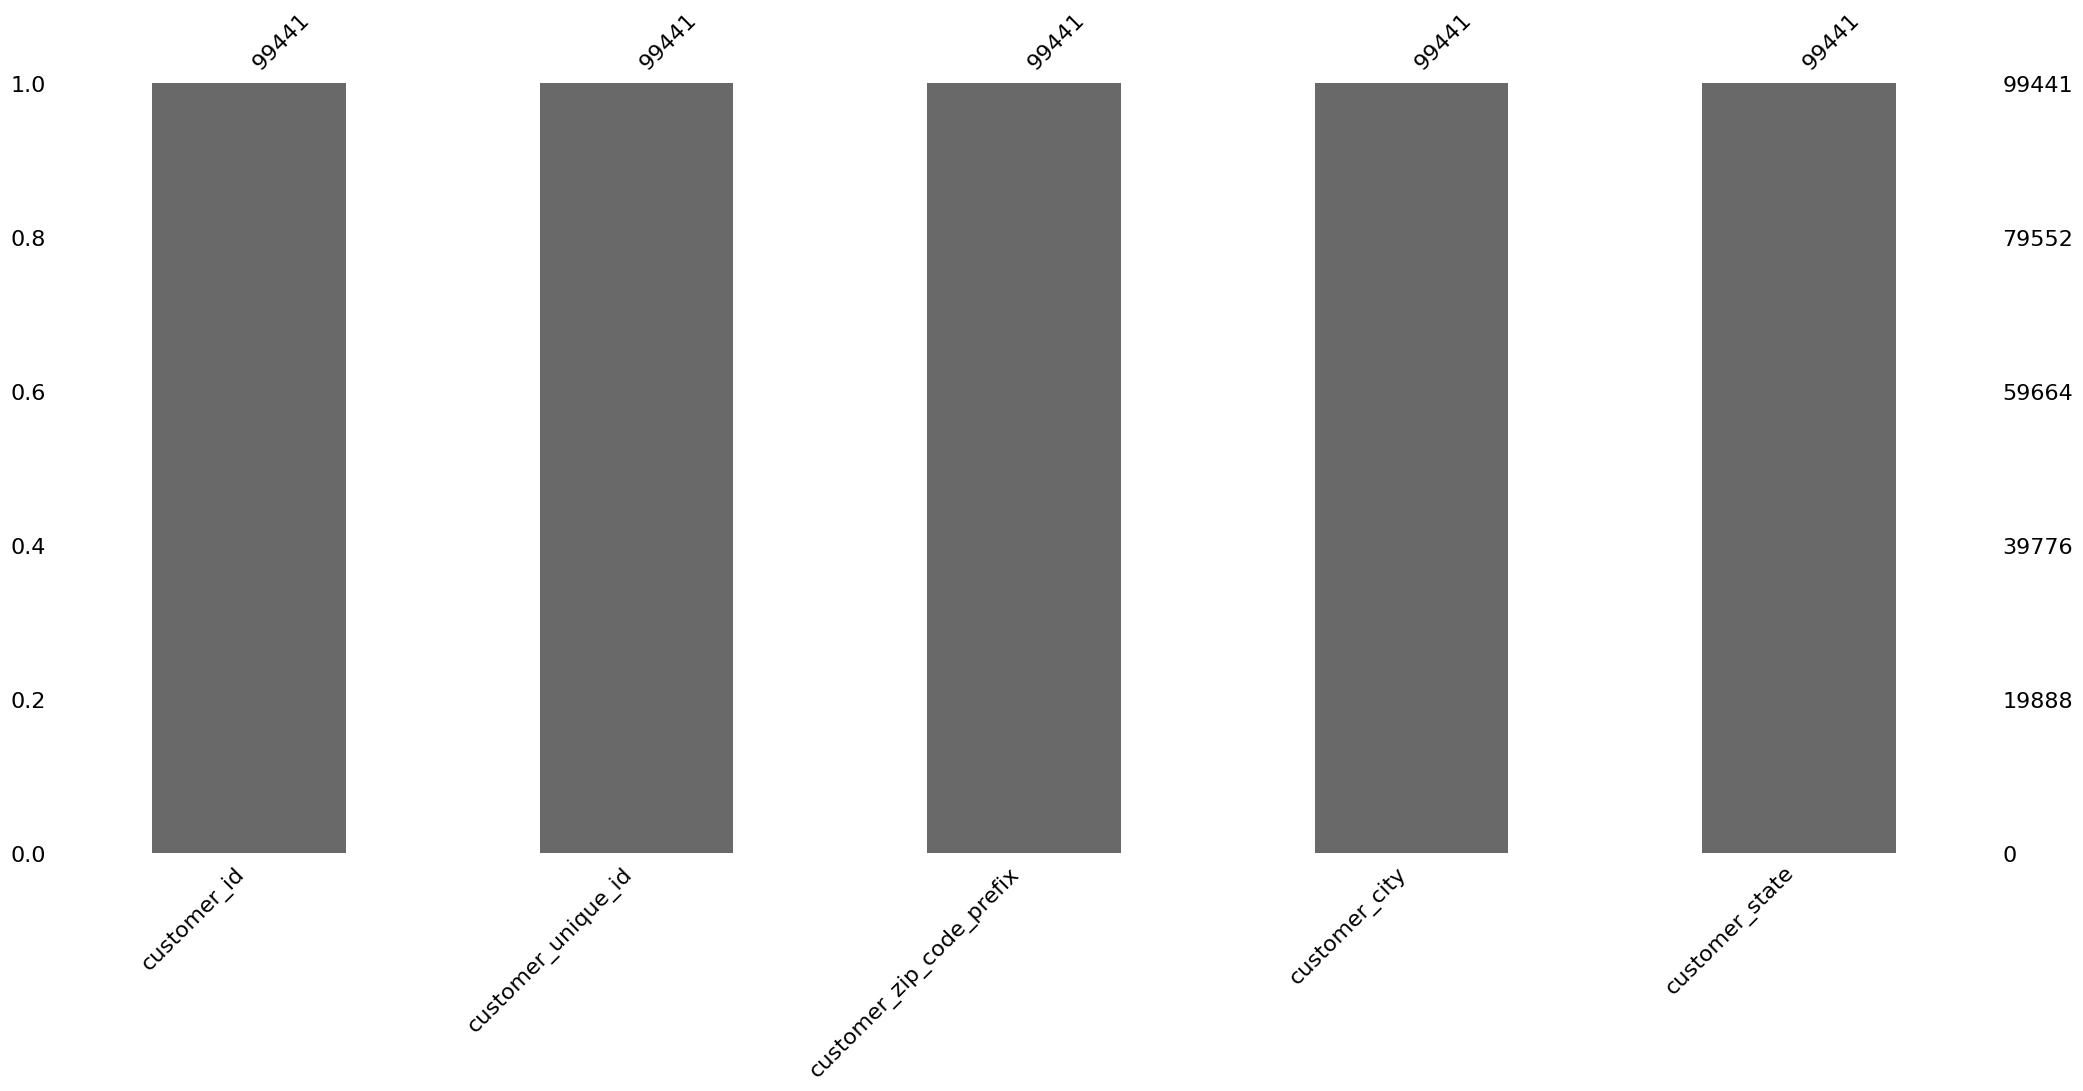

In [9]:
# Graficamos, para chequear valores nulos en las distintas columnas para mejorar el análisis.
msno.bar(df_customers)

Geolocation.

In [10]:
# Comprobamos la correcta carga.
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# Detectamos el total de datos de la tabla.
df_geolocation.shape

(1000163, 5)

In [12]:
# Obtenemos informacion generalizada del Data Frame.
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
# Buscar duplicados
df_geolocation[df_geolocation.duplicated()] # Se observa si tiene registros duplicados

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [14]:
# Contamos la cantidad de duplicados.
print("La cantidad de registros duplicados es: ", df_geolocation.duplicated().sum())

La cantidad de registros duplicados es:  261831


In [15]:
# Corroboramos que no haya Id's repetidos.
print("La cantidad de registros duplicados es: ", df_geolocation['geolocation_zip_code_prefix'].duplicated().sum())

La cantidad de registros duplicados es:  981148


<AxesSubplot: >

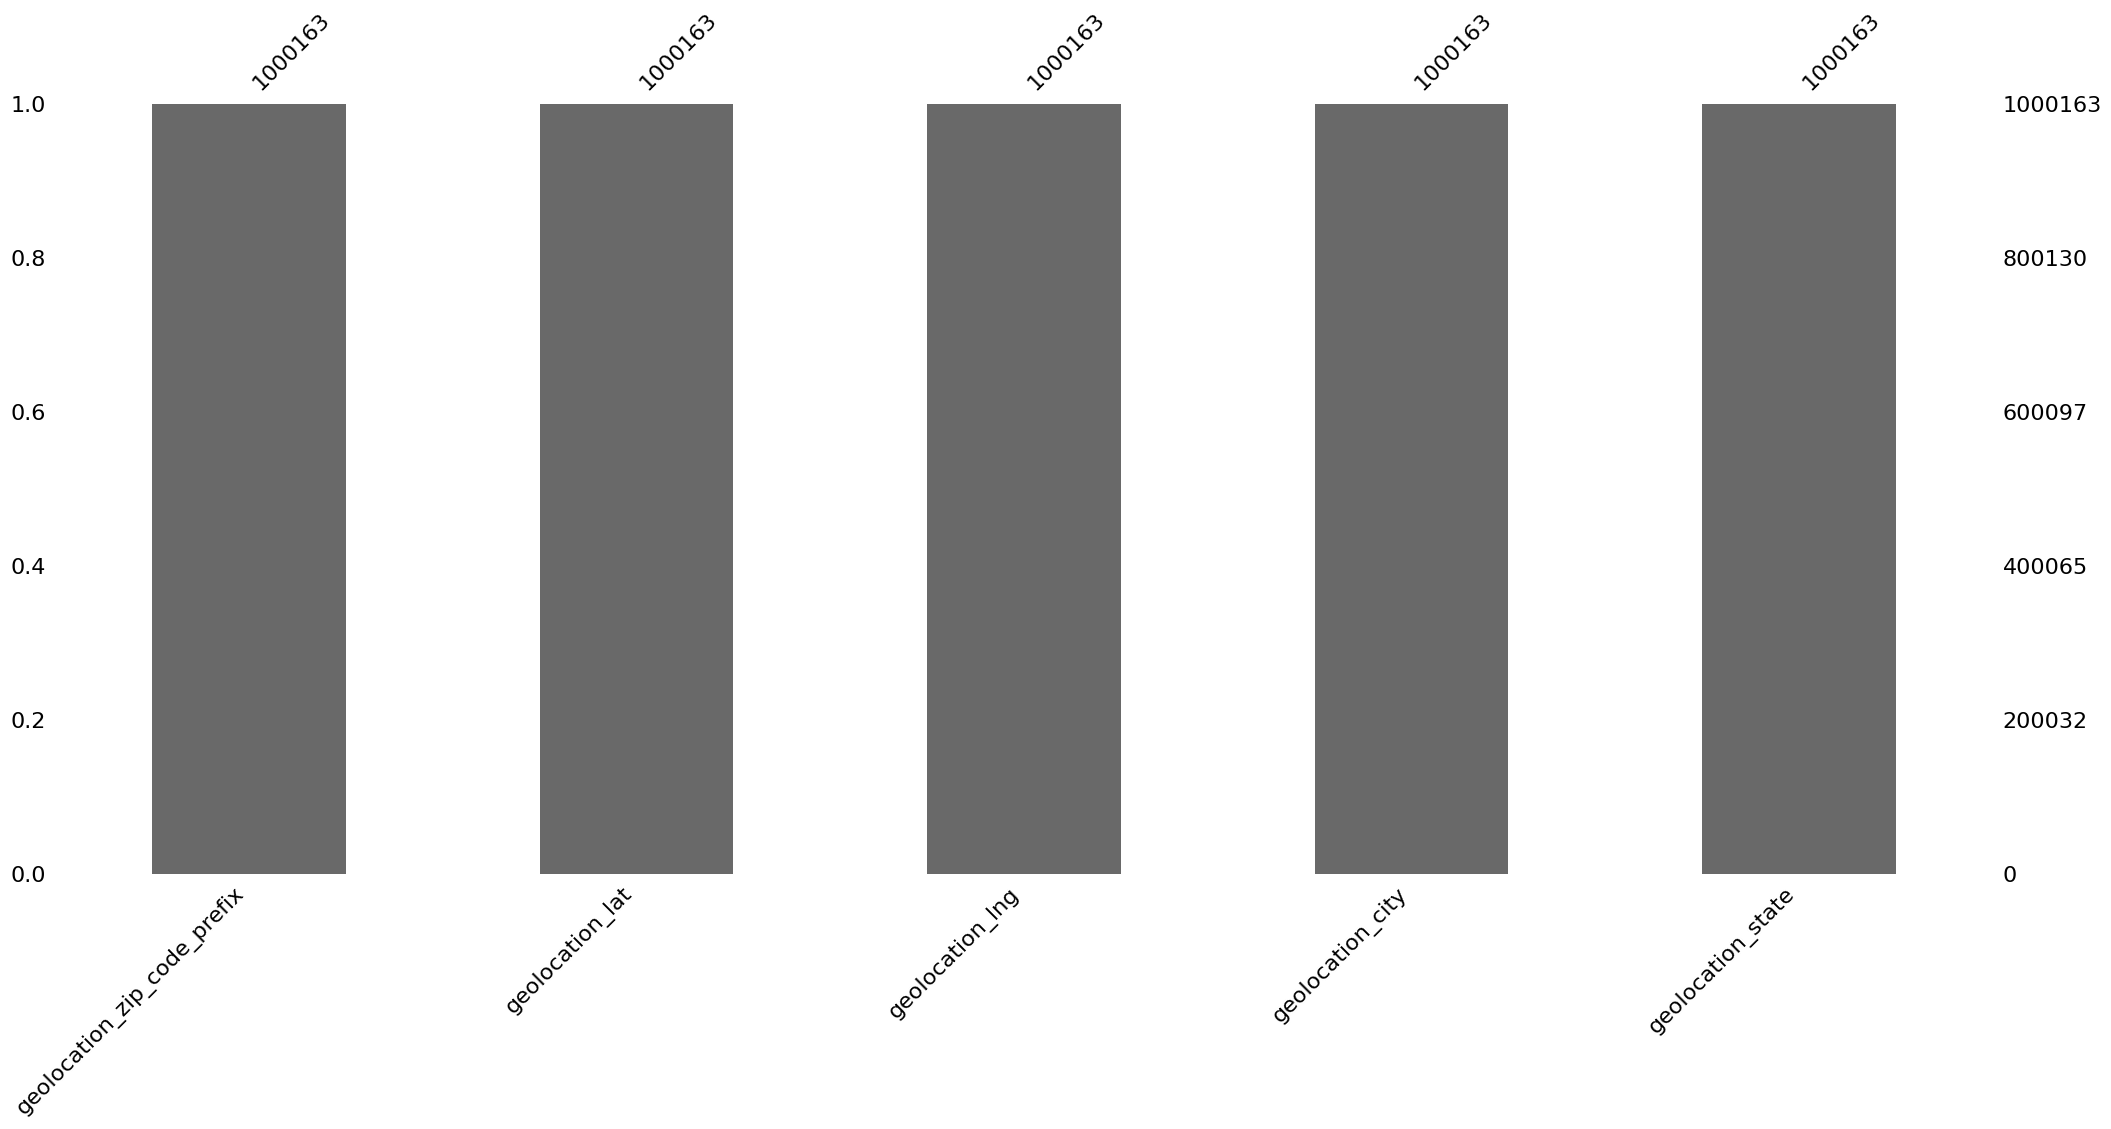

In [16]:
# Graficamos, para chequear valores nulos en las distintas columnas para mejorar el análisis.
msno.bar(df_geolocation)

Order items

In [17]:
# Comprobamos la correcta carga.
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Esta tabla no posee una columna de Id's (Indice/Identidad) propia. evaluar su generación.

In [18]:
# Detectamos el total de datos de la tabla.
df_order_items.shape

(112650, 7)

In [19]:
# Obtenemos informacion generalizada del Data Frame.
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
# Buscar duplicados
df_order_items[df_order_items.duplicated()] # Se observa si tiene registros duplicados

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [21]:
# Contamos la cantidad de duplicados.
print("La cantidad de registros duplicados es: ", df_order_items.duplicated().sum())

La cantidad de registros duplicados es:  0


<AxesSubplot: >

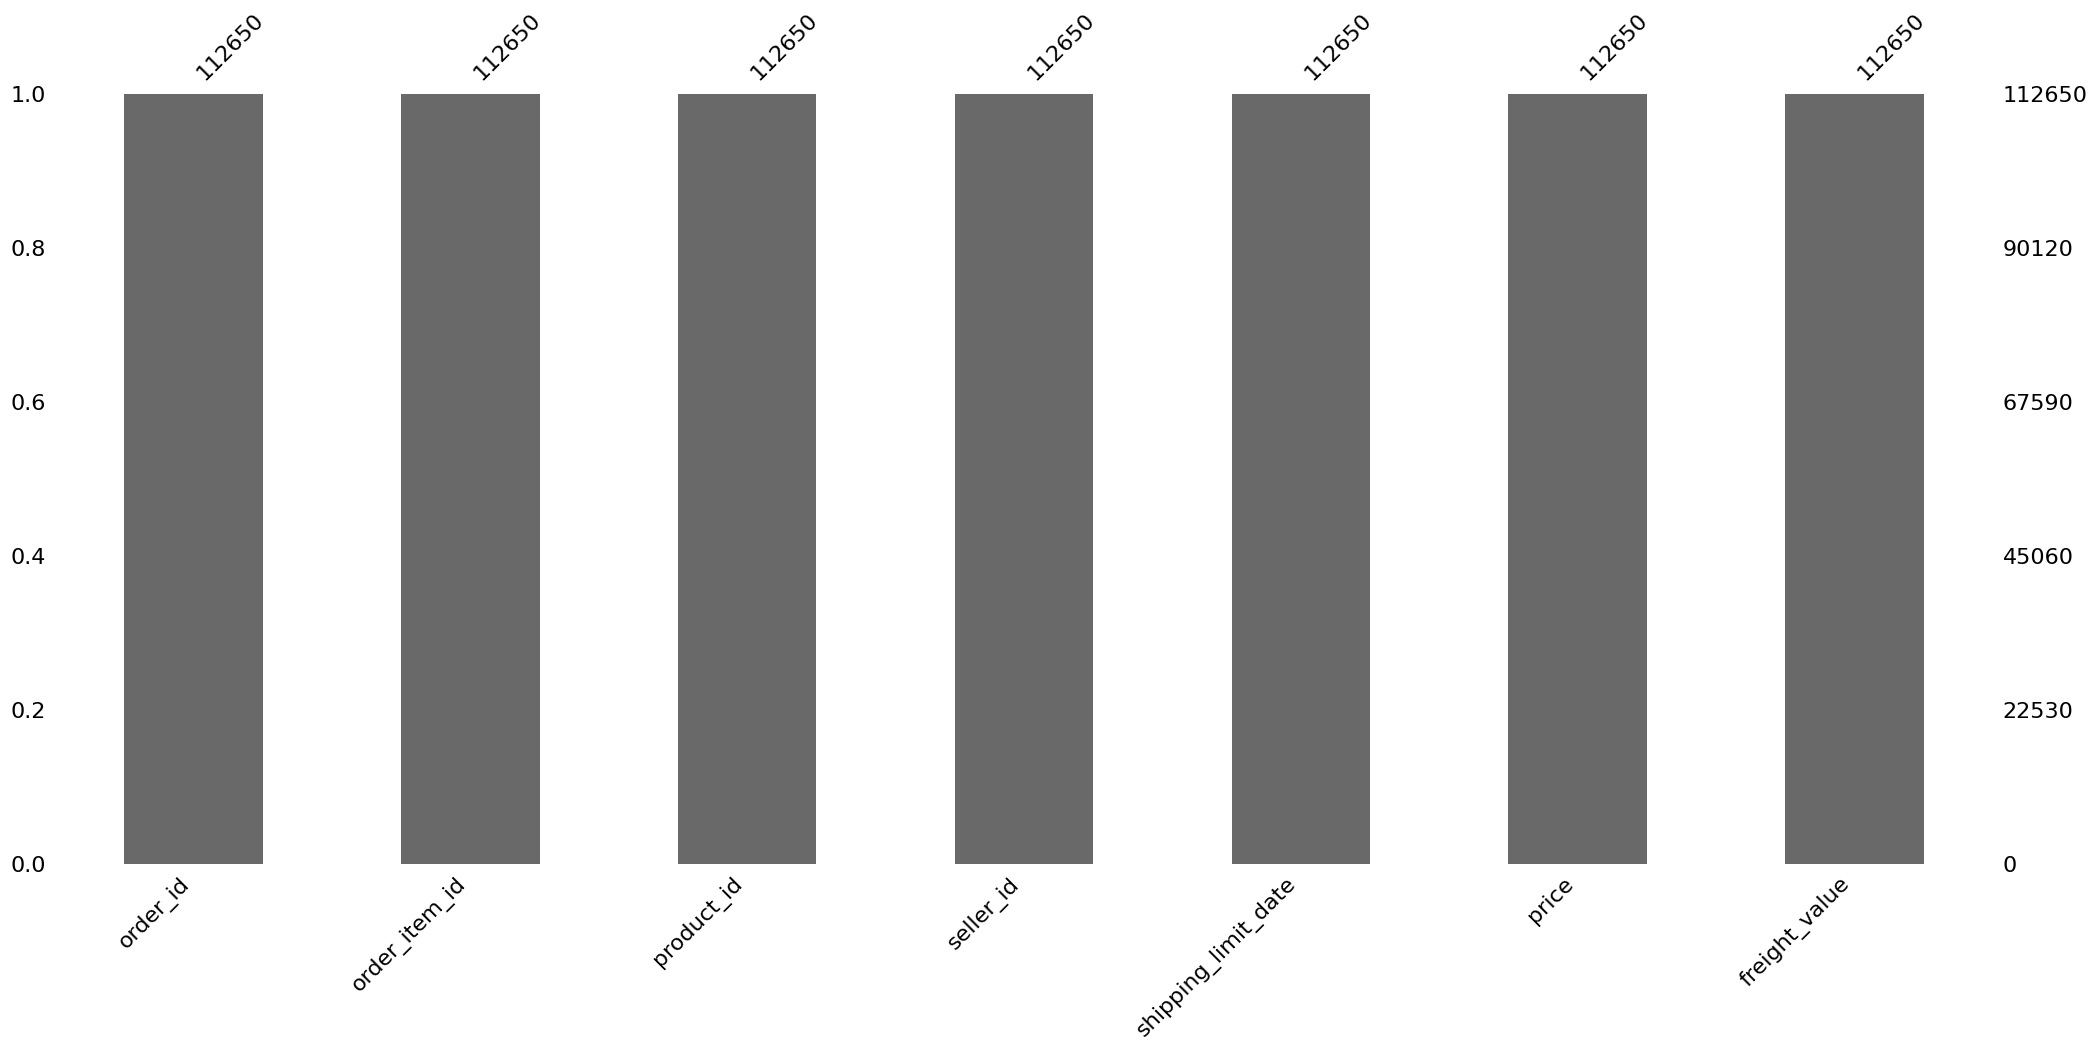

In [22]:
# Graficamos, para chequear valores nulos en las distintas columnas para mejorar el análisis.
msno.bar(df_order_items)

Orders

In [23]:
# Comprobamos la correcta carga.
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
# Detectamos el total de datos de la tabla.
df_orders.shape

(99441, 8)

In [25]:
# Obtenemos informacion generalizada del Data Frame.
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
# Buscar duplicados
df_orders[df_orders.duplicated()] # Se observa si tiene registros duplicados

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [27]:
# Contamos la cantidad de duplicados.
print("La cantidad de registros duplicados es: ", df_orders.duplicated().sum())

La cantidad de registros duplicados es:  0


In [28]:
# Corroboramos que no haya Id's repetidos.
print("La cantidad de registros duplicados es: ", df_orders['order_id'].duplicated().sum())

La cantidad de registros duplicados es:  0


<AxesSubplot: >

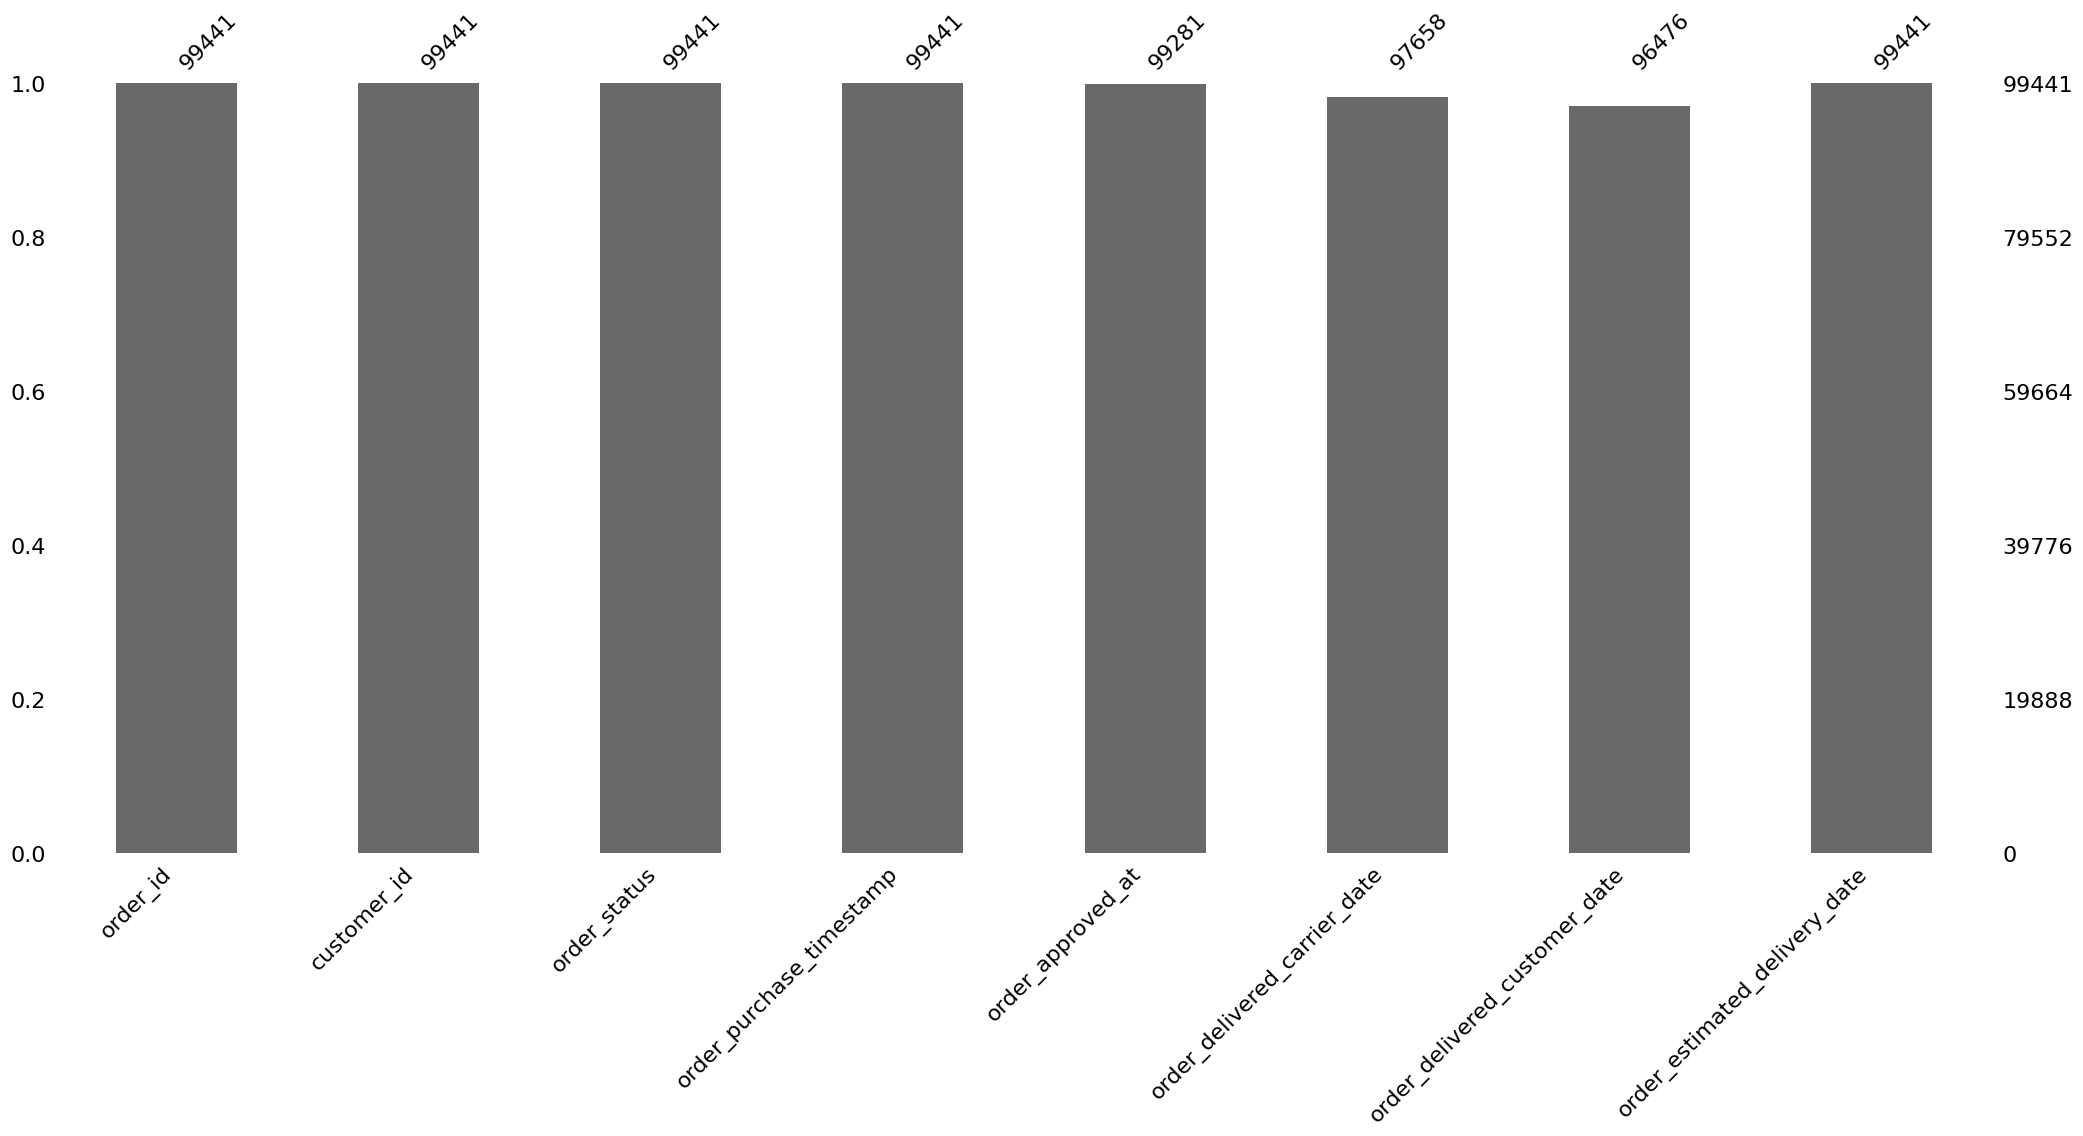

In [29]:
# Graficamos, para chequear valores nulos en las distintas columnas para mejorar el análisis.
msno.bar(df_orders)

Sellers

In [30]:
# Comprobamos la correcta carga.
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [31]:
# Detectamos el total de datos de la tabla.
df_sellers.shape

(3095, 4)

In [32]:
# Obtenemos informacion generalizada del Data Frame.
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [33]:
# Buscar duplicados
df_sellers[df_sellers.duplicated()] # Se observa si tiene registros duplicados

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [34]:
# Contamos la cantidad de duplicados.
print("La cantidad de registros duplicados es: ", df_sellers.duplicated().sum())

La cantidad de registros duplicados es:  0


In [35]:
# Corroboramos que no haya Id's repetidos.
print("La cantidad de registros duplicados es: ", df_sellers['seller_id'].duplicated().sum())

La cantidad de registros duplicados es:  0


<AxesSubplot: >

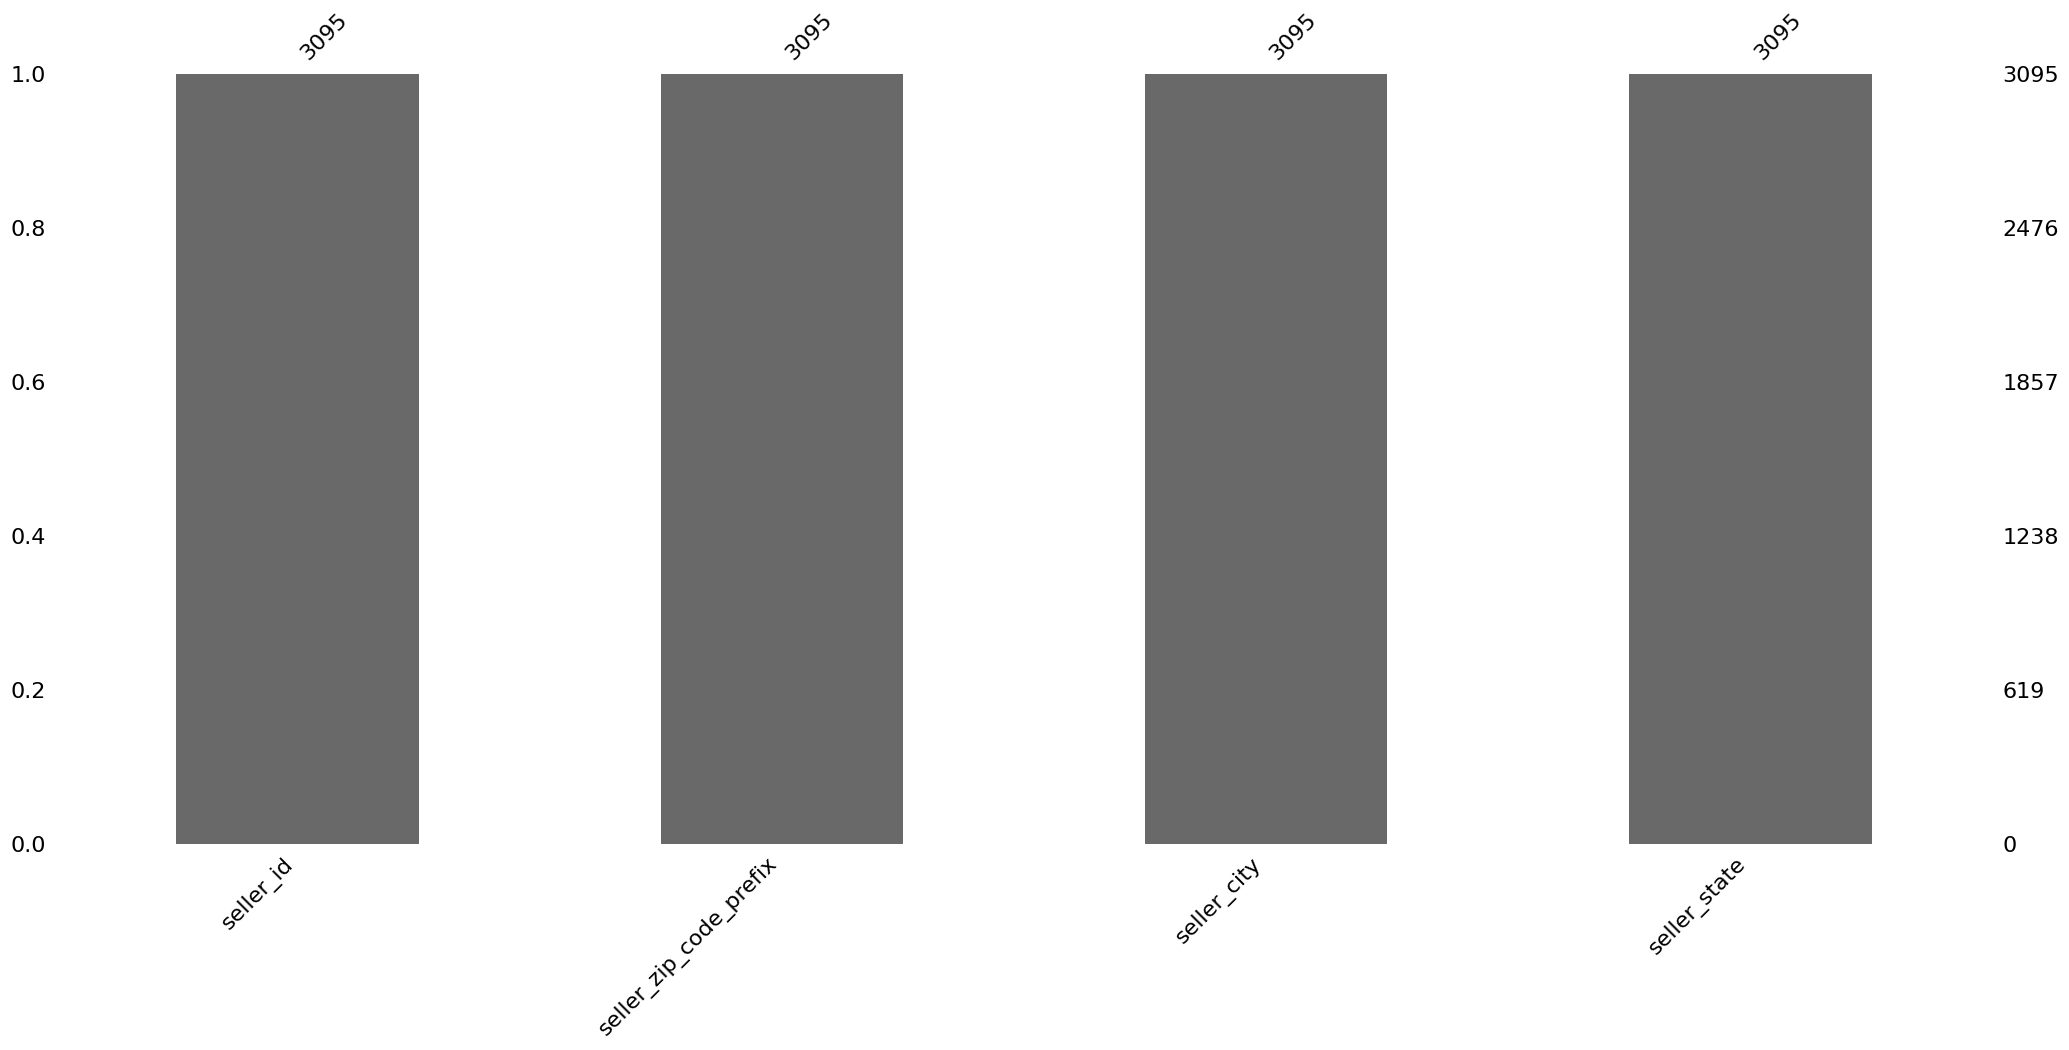

In [36]:
# Graficamos, para chequear valores nulos en las distintas columnas para mejorar el análisis.
msno.bar(df_sellers)